# 1. Screening

In [5]:
#Bibliotecas
import fundamentus
import pandas as pd
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import riskfolio as rp
import vectorbt as vbt

In [ ]:
#Obtendo os dados
df = fundamentus.get_resultado()

/home/fabricio/.local/lib/python3.10/site-packages/fundamentus/resultado.py:50: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(content.text, decimal=",", thousands='.')[0]


In [7]:
df.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AALR3,8.92,-4.01,1.04,0.914,0.0000,0.384,-4.72,49.46,-0.97,84.92,13.10,0.0185,-0.2210,0.0091,-0.2592,0.74,1462070.0,1.015110e+09,1.04,0.0354
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1429,0.00,0.0,5.721810e+09,0.00,0.7094
ABCB4,23.50,6.81,0.97,0.000,0.0640,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1429,0.00,14812300.0,5.721810e+09,0.00,0.7094
ABEV3,13.62,14.23,2.38,2.603,0.0536,1.556,57.88,12.62,-24.38,11.80,8.68,0.2063,0.1882,0.1650,0.1671,1.11,322647000.0,9.025490e+10,0.04,0.1323
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641


In [9]:
df.shape

(967, 20)

In [10]:
#Filtra pelo PL > 0 e DY > 10% e depois Ordena do Maior para o menor DY
df[(df.pl > 0) & (df.dy) > 0.1].sort_values('dy', ascending = False)

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
EPAR3,10.00,4.69,1.20,0.309,262.5560,1.047,2.30,12.51,2.96,10.97,9.60,0.0247,0.0658,0.0971,0.2558,18.54,3.964620e+05,1.238600e+08,0.01,0.0824
BSLI4,12.22,15.48,1.80,0.000,12.6055,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1162,0.00,9.911510e+03,2.467570e+09,0.00,0.0189
BSLI3,13.14,16.64,1.93,0.000,10.6572,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1162,0.00,4.992080e+03,2.467570e+09,0.00,0.0189
TRPN3,0.71,0.44,0.54,0.263,1.0474,0.399,0.59,0.36,0.59,-0.35,-0.35,0.7228,0.5929,5.2301,1.2235,3.61,0.000000e+00,5.935800e+07,0.00,0.0577
LEVE3,36.24,6.85,3.13,1.107,0.2581,1.560,5.06,6.02,10.70,6.00,5.34,0.1837,0.1613,0.3602,0.4573,1.91,2.229400e+07,1.568530e+09,0.31,0.1850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRIO3,46.28,9.06,3.20,4.069,0.0016,1.447,33.60,7.32,-3.92,8.79,6.58,0.5562,0.4493,0.2199,0.3533,1.32,4.945860e+08,1.290110e+10,0.82,0.7399
MSPA4,40.00,7.79,0.31,1.331,0.0015,0.179,5.25,-26.51,-0.56,-35.62,42.00,-0.0502,0.1710,-0.0071,0.0394,1.56,0.000000e+00,8.340810e+08,0.17,0.1488
DESK3,13.91,17.97,1.27,1.741,0.0014,0.545,-22.83,5.31,-1.25,7.59,5.08,0.3278,0.1089,0.1112,0.0708,0.84,3.223280e+06,1.260890e+09,0.68,0.4475


In [11]:
#Cria uma nova coluna
df['Ticket'] = df.index.str[:4]
df.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Ticket
papel,,,,,,,,,,,,,,,,,,,,,
AALR3,8.92,-4.01,1.04,0.914,0.0000,0.384,-4.72,49.46,-0.97,84.92,...,0.0185,-0.2210,0.0091,-0.2592,0.74,1462070.0,1.015110e+09,1.04,0.0354,AALR
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1429,0.00,0.0,5.721810e+09,0.00,0.7094,ABCB
ABCB4,23.50,6.81,0.97,0.000,0.0640,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1429,0.00,14812300.0,5.721810e+09,0.00,0.7094,ABCB
ABEV3,13.62,14.23,2.38,2.603,0.0536,1.556,57.88,12.62,-24.38,11.80,...,0.2063,0.1882,0.1650,0.1671,1.11,322647000.0,9.025490e+10,0.04,0.1323,ABEV
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,...,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641,ABYA


In [12]:
#Remove os Tickets duplicados
df = df.drop_duplicates(subset=['Ticket'])
df.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Ticket
papel,,,,,,,,,,,,,,,,,,,,,
AALR3,8.92,-4.01,1.04,0.914,0.0000,0.384,-4.72,49.46,-0.97,84.92,...,0.0185,-0.2210,0.0091,-0.2592,0.74,1462070.0,1.015110e+09,1.04,0.0354,AALR
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1429,0.00,0.0,5.721810e+09,0.00,0.7094,ABCB
ABEV3,13.62,14.23,2.38,2.603,0.0536,1.556,57.88,12.62,-24.38,11.80,...,0.2063,0.1882,0.1650,0.1671,1.11,322647000.0,9.025490e+10,0.04,0.1323,ABEV
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,...,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641,ABYA
ACES3,95.27,8.79,2.28,1.693,0.0000,1.438,6.40,7.20,20.77,6.54,...,0.2352,0.1927,0.2690,0.2595,2.05,0.0,3.105800e+09,0.09,0.1334,ACES


In [13]:
#Filtra as empresas com o PL positivo e Divida Bruta Sobre Patrimônio menor que 50%
filtrado = df[(df.patrliq > 0) & (df.divbpatr < 0.5)]
filtrado

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Ticket
papel,,,,,,,,,,,,,,,,,,,,,
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1429,0.00,0.000000e+00,5.721810e+09,0.00,0.7094,ABCB
ABEV3,13.62,14.23,2.38,2.603,0.0536,1.556,57.88,12.62,-24.38,11.80,...,0.2063,0.1882,0.1650,0.1671,1.11,3.226470e+08,9.025490e+10,0.04,0.1323,ABEV
ACES3,95.27,8.79,2.28,1.693,0.0000,1.438,6.40,7.20,20.77,6.54,...,0.2352,0.1927,0.2690,0.2595,2.05,0.000000e+00,3.105800e+09,0.09,0.1334,ACES
AEDU11,37.35,20.13,1.13,1.405,0.0000,0.732,5.77,13.93,-7.31,16.14,...,0.1008,0.0698,0.0577,0.0560,2.04,0.000000e+00,2.415400e+09,0.30,0.2090,AEDU
AFLT3,8.45,19.31,2.04,7.289,0.0703,1.704,17.47,18.44,50.87,18.03,...,0.3953,0.3774,0.0979,0.1055,1.98,3.923770e+03,2.616040e+08,0.00,0.2936,AFLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VSTE3,19.15,9.13,2.11,1.965,0.0060,1.290,12.21,79.38,-19.60,88.96,...,0.0248,0.2151,0.0181,0.2313,1.48,6.403610e+05,1.028360e+09,0.30,0.0734,VSTE
VULC3,19.64,8.56,2.43,1.747,0.0476,1.725,3.19,9.73,4.21,9.75,...,0.1795,0.2041,0.2168,0.2843,4.39,1.146790e+07,1.985350e+09,0.19,0.2513,VULC
WEGE3,35.17,28.50,9.16,4.624,0.0175,4.908,15.34,21.21,20.31,20.80,...,0.2180,0.1660,0.3156,0.3213,1.86,1.984670e+08,1.612300e+10,0.18,0.2710,WEGE


In [15]:
#Ordena com base na Dívida Bruta Sobre o Patrimônio
div_bruta_patr = filtrado.sort_values('divbpatr', ascending = True)

#Retorna as primeiras 50
div_bruta_patr = div_bruta_patr.head(50)
div_bruta_patr

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Ticket
papel,,,,,,,,,,,,,,,,,,,,,
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1429,0.00,0.00,5.721810e+09,0.0,0.7094,ABCB
CORR3,12.00,0.04,0.06,0.834,0.0000,0.017,0.03,-0.08,0.42,3.33,...,-10.5766,21.4114,-0.8544,1.5284,4.25,0.00,4.665000e+06,0.0,-0.4209,CORR
MPLU3,26.80,12.20,17.37,6.877,0.0000,2.676,50.65,10.34,66.01,7.71,...,0.6652,0.5637,1.2957,1.4240,1.06,0.00,2.502790e+08,0.0,-0.1888,MPLU
NINJ3,4.94,83.98,0.88,4.129,0.0000,0.825,0.94,-9.27,0.94,0.95,...,-0.4453,0.0492,-1.3111,0.0105,16.07,719895.00,2.851950e+08,0.0,0.0333,NINJ
ODER3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.0000,0.00,0.00,4.981200e+08,0.0,0.2475,ODER
CLAN3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,-0.0105,0.00,0.00,1.012240e+09,0.0,-0.6396,CLAN
CGRA3,26.05,6.10,0.60,0.780,0.1017,0.433,1.61,6.46,2.79,4.73,...,0.1209,0.1281,0.0832,0.0980,2.66,116652.00,8.757810e+08,0.0,0.1206,CGRA
ODPV3,11.85,13.31,4.46,3.108,0.0316,3.149,-162.32,9.78,-42.01,9.26,...,0.3179,0.2335,0.3931,0.3350,0.92,14221600.00,1.467850e+09,0.0,0.0392,ODPV
PINE3,4.50,6.73,0.98,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.0000,0.1449,0.00,285.28,9.645100e+08,0.0,1.2768,PINE


In [16]:
#Cria uma nova coluna e adiciona o .SA ao Ticket
div_bruta_patr['ACAO'] = div_bruta_patr.index + '.SA'

In [17]:
def is_traded_recently(symbol): #Verifica se a Ação foi negociada recentemente
    try:
        #Traz os dados históricos de cotação para aquela ação
        stock = yf.Ticker(symbol)
        historical_data = stock.history(period='1mo')

        #Traz a cotação mais recente e obtem a data correspondente
        last_trading_day = historical_data.index[-1].date()

        #Verifica o dia de negociação mais recente
        today = datetime.now().date()
        window_start = today - timedelta(days=5)

        return window_start <= last_trading_day <= today
    except Exception:

        return False

In [18]:
#Aplica para cada Ação a Função
div_bruta_patr['Negociada'] = div_bruta_patr['ACAO'].apply(is_traded_recently)

2024-01-16 17:05:52,118 [base.history] ERROR: ABCB3.SA: No price data found, symbol may be delisted (period=1mo)
2024-01-16 17:06:03,359 [base.history] ERROR: MPLU3.SA: No data found, symbol may be delisted
2024-01-16 17:06:11,677 [base.history] ERROR: ODER3.SA: No data found, symbol may be delisted
2024-01-16 17:06:24,321 [base.history] ERROR: CLAN3.SA: No data found, symbol may be delisted
2024-01-16 17:06:38,583 [base.history] ERROR: MOSI3.SA: No data found, symbol may be delisted
2024-01-16 17:06:38,917 [base.history] ERROR: PORP4.SA: No price data found, symbol may be delisted (period=1mo)
2024-01-16 17:06:39,681 [base.history] ERROR: BSCT3.SA: No price data found, symbol may be delisted (period=1mo)
2024-01-16 17:06:48,724 [base.history] ERROR: PRBC3.SA: No data found, symbol may be delisted
2024-01-16 17:07:00,112 [base.history] ERROR: BPNM3.SA: No data found, symbol may be delisted
2024-01-16 17:07:01,648 [base.history] ERROR: BPIA3.SA: No price data found, symbol may be delist

In [19]:
#Filtra somente as Ações que foram negociadas
empresas_filtradas = div_bruta_patr[div_bruta_patr['Negociada'] == True]

In [20]:
#Ordena pelo maior ROE e retorna somente as 10 primeiras ações
empresas_filtradas = empresas_filtradas.sort_values('roe', ascending = False).head(10)
empresas_filtradas

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y,Ticket,ACAO,Negociada
papel,,,,,,,,,,,,,,,,,,,,,
CORR3,12.00,0.04,0.06,0.834,0.0000,0.017,0.03,-0.08,0.42,3.33,...,-0.8544,1.5284,4.25,0.00,4.665000e+06,0.0,-0.4209,CORR,CORR3.SA,True
ODPV3,11.85,13.31,4.46,3.108,0.0316,3.149,-162.32,9.78,-42.01,9.26,...,0.3931,0.3350,0.92,14221600.00,1.467850e+09,0.0,0.0392,ODPV,ODPV3.SA,True
CXSE3,13.02,11.07,3.06,0.000,0.0776,3.033,20.44,-335.74,20.47,-319.59,...,-0.0106,0.2765,17.58,34461500.00,1.276040e+10,0.0,0.0000,CXSE,CXSE3.SA,True
BRAP3,22.31,4.13,1.09,0.000,0.1231,1.079,19.10,-429.38,19.12,-404.75,...,-0.0027,0.2644,5.31,1883710.00,8.023720e+09,0.0,0.0000,BRAP,BRAP3.SA,True
CEBR3,18.00,6.66,1.24,4.483,0.1473,0.887,2.02,18.11,2.13,8.68,...,0.0922,0.1863,6.09,161585.00,1.045450e+09,0.0,-0.4474,CEBR,CEBR3.SA,True
PSSA3,28.46,8.47,1.55,0.588,0.0496,0.337,5.97,0.71,-2.86,0.27,...,0.5964,0.1833,1.09,42497100.00,1.185790e+10,0.0,0.1592,PSSA,PSSA3.SA,True
ITUB3,28.20,8.89,1.58,0.000,0.0446,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.1772,0.00,15256000.00,1.754140e+11,0.0,0.2857,ITUB,ITUB3.SA,True
PINE3,4.50,6.73,0.98,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.1449,0.00,285.28,9.645100e+08,0.0,1.2768,PINE,PINE3.SA,True
BSLI3,13.14,16.64,1.93,0.000,10.6572,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.1162,0.00,4992.08,2.467570e+09,0.0,0.0189,BSLI,BSLI3.SA,True


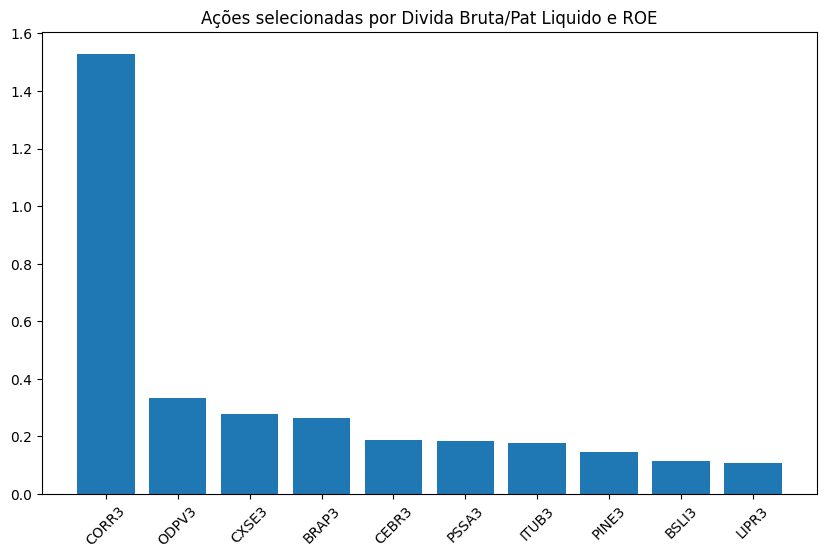

In [21]:
#Plota o Gŕafico de Barra
plt.figure(figsize=(10,6));
plt.bar(empresas_filtradas.tail(10).index, empresas_filtradas.tail(10).roe);
plt.xticks(rotation=45);
plt.title("Ações selecionadas por Divida Bruta/Pat Liquido e ROE");

In [24]:
ativos = [empresas_filtradas.index + '.SA']
ativos

[Index(['CORR3.SA', 'ODPV3.SA', 'CXSE3.SA', 'BRAP3.SA', 'CEBR3.SA', 'PSSA3.SA',
        'ITUB3.SA', 'PINE3.SA', 'BSLI3.SA', 'LIPR3.SA'],
       dtype='object', name='papel')]